In [3]:
import torch
from yolox.exp import get_exp
from yolox.utils import get_model_info

# Define your experiment/model configuration
# You need to specify which YOLOX variant you finetuned (s, m, l, x, nano, tiny)
exp = get_exp(exp_file=None, exp_name="yolox-l")  # Replace with your variant

# Build the model
model = exp.get_model()

# Load the checkpoint
ckpt = torch.load("yolox_l.pth", map_location="cpu")

# Handle different checkpoint formats
if "model" in ckpt:
    model.load_state_dict(ckpt["model"])
else:
    model.load_state_dict(ckpt)

# Set to evaluation mode
model.eval()

# Optional: Move to GPU
if torch.cuda.is_available():
    model = model.cuda()

# Print model info
model_info = get_model_info(model, exp.test_size)
print(f"Model Summary: {model_info}")

/var/folders/br/w32q7z3s33j_j8w7b42_dt6w0000gn/T/ipykernel_30250/3682072502.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("yolox_l.pth", map_locatio

Model Summary: Params: 54.21M, Gflops: 156.01


In [ ]:
import torch
from yolox.exp import get_exp
from yolox.utils import get_model_info

# Define your experiment/model configuration
# You need to specify which YOLOX variant you finetuned (s, m, l, x, nano, tiny)
exp = get_exp(exp_file=None, exp_name="yolox-s")  # Replace with your variant

# Build the model
model = exp.get_model()

# Load the checkpoint
ckpt = torch.load("path/to/your/model.pth", map_location="cpu")

# Handle different checkpoint formats
if "model" in ckpt:
    model.load_state_dict(ckpt["model"])
else:
    model.load_state_dict(ckpt)

# Set to evaluation mode
model.eval()

# Optional: Move to GPU
if torch.cuda.is_available():
    model = model.cuda()

# Print model info
model_info = get_model_info(model, exp.test_size)
print(f"Model Summary: {model_info}")

In [4]:
from yolox.data.data_augment import ValTransform
from yolox.utils import postprocess
import cv2
import numpy as np

# Load and preprocess image
image = cv2.imread("car_test.png")
height, width = image.shape[:2]

# Preprocess
preproc = ValTransform(legacy=False)
img, _ = preproc(image, None, exp.test_size)
img = torch.from_numpy(img).unsqueeze(0).float()

if torch.cuda.is_available():
    img = img.cuda()

# Inference
with torch.no_grad():
    outputs = model(img)
    outputs = postprocess(
        outputs, exp.num_classes, exp.test_conf, exp.nmsthre
    )[0]

# Process outputs
if outputs is not None:
    outputs[:, 0:4] /= min(exp.test_size[0] / height, exp.test_size[1] / width)
    # outputs contains: [x1, y1, x2, y2, obj_conf, class_conf, class_id]

In [13]:
from yolox.utils.visualize import vis

boxes = outputs[:, 0:4]
scores = outputs[:, 4] 
class_ids = outputs[:, 5]

class_names = [str(i+1) for i in range(80)]

img_with_bbox = vis(image, boxes=boxes, scores=scores, cls_ids=class_ids, class_names=class_names)


In [8]:
scores = outputs[:, 4] 
scores

tensor([0.9828, 0.9962, 0.7980, 0.2335, 0.0587, 0.0306])

In [14]:
type(img_with_bbox)

numpy.ndarray

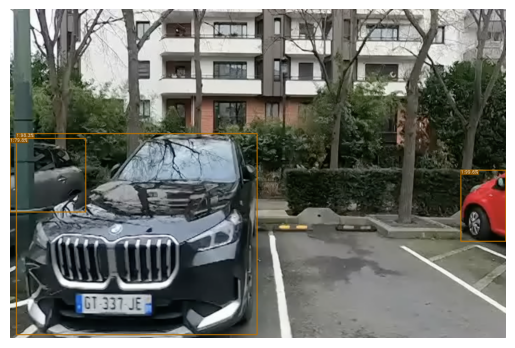

In [16]:
cv2.imshow("Detection Results", img_with_bbox)

# In a standard Jupyter environment, cv2.imshow() may not work as expected.
# A common way to display images is using matplotlib.
import matplotlib.pyplot as plt

# OpenCV loads images in BGR order, but matplotlib expects RGB.
# We need to convert the color space.
plt.imshow(cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axes
plt.show()

# If you are in an environment where cv2.imshow() works, you would typically follow it with:
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# However, the matplotlib approach is more portable for notebooks.